In [2]:
import copy , math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced  #This line controls how many decimal places are displayed when printing NumPy arrays:

problem ,
dataset has 3 ex,
four features

In [3]:
x_train=np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train=np.array([460, 232, 178])

 Matrix X containing our examples

In [4]:
#data is stored in np array/matrix
print(f"x shape: {x_train .shape} , x type :{type(x_train)}")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

x shape: (3, 4) , x type :<class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


w ,b


In [7]:
b_init=785.1811367994083
w_int=np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_int.shape}, b_init type:{type(b_init)}")
print(w_int)

w_init shape: (4,), b_init type:<class 'float'>
[  0.39  18.75 -53.36 -26.42]


single prediction element by element

In [8]:
def predict_single_loop(x,w,b):
  n=x.shape[0]
  p=0
  for i in range(n):
    p_i=x[i]*w[i]
    p=p+p_i
  p= p + b
  return p




get a row from our training data

In [9]:
x_vec=x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value:{x_vec}")

# make a prediction
f_wb=predict_single_loop(x_vec,w_int,b_init)
print(f"f_wb shape {f_wb.shape}, prediction:{f_wb}")

x_vec shape (4,), x_vec value:[2104    5    1   45]
f_wb shape (), prediction:459.9999976194083


single prediction vector

In [10]:
def predict (x,w,b):
  p=np.dot(x,w)+b
  return p

In [13]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_int, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


 Compute Cost With Multiple **Variables**

In [16]:
def comput_cost(x,y,w,b):
  m=x.shape[0]
  cost=0.0
  for i in range(m):
    f_i=np.dot(x[i],w)+b
    cost=cost+(f_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [17]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = comput_cost(x_train, y_train, w_int, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 9.445361366440227e-13


gradient descent

In [18]:
def compute_gradient(x,y,w,b):
  m,n=x.shape  #(number of examples, number of features)
  dj_dw=np.zeros((n,))
  dj_db=0.

  for i in range(m):
    err=(np.dot(x[i],w)+b) - y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_db=dj_db+err
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_db,dj_dw


In [19]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_int, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


Gradient Descent With Multiple Variables

In [20]:
def gradient_descent(x,y,w_in,b_in,cost_fun,grad_fun,alpha,num_iters):
  J_history=[]
  w=copy.deepcopy(w_in)
  b=b_in
  for i in range(num_iters):
    dj_db,dj_dw=grad_fun(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    if i<100000:
      J_history.append(cost_fun(x,y,w,b))

    if i%math.ceil(num_iters/10)==0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

  return w,b,J_history



In [21]:
# initialize parameters
initial_w = np.zeros_like(w_int)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    comput_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   384.69   
Iteration  100: Cost   196.63   
Iteration  200: Cost   195.94   
Iteration  300: Cost   195.25   
Iteration  400: Cost   194.57   
Iteration  500: Cost   193.89   
Iteration  600: Cost   193.22   
Iteration  700: Cost   192.55   
Iteration  800: Cost   191.88   
Iteration  900: Cost   191.22   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


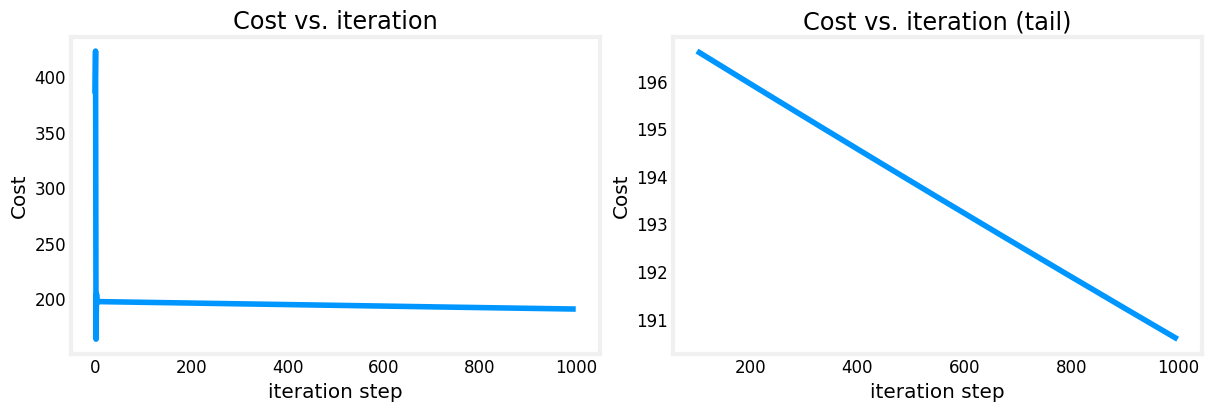

In [22]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()